In [4]:
%matplotlib inline 
import numpy as np
import scipy
import scipy.spatial
from scipy.io import wavfile
import matplotlib.pyplot as plt
import pylab

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

(sample_rate_eh, input_signal_eh) = wavfile.read("audio_files/vowel_eh.wav")

print('Number of individual samples in Eh signal is ...', len(input_signal_eh))
print('The sampling rate should be twice the approx max frequency of human hearing (22 kHz) ...', sample_rate_eh)

Number of individual samples in Eh signal is ... 111616
The sampling rate should be twice the approx max frequency of human hearing (22 kHz) ... 44100


In [5]:
# Make a list of times, one for each sample. Assume sample rate is in Hz so times are in seconds.

time_array_eh = np.arange(0, len(input_signal_eh)/sample_rate_eh, 1/sample_rate_eh)

# To avoid too much calculation, let's use signal durations of only 1/10th second.

time_array_eh = time_array_eh[0:(sample_rate_eh//10)]
input_signal_eh = input_signal_eh[0:(sample_rate_eh//10)]


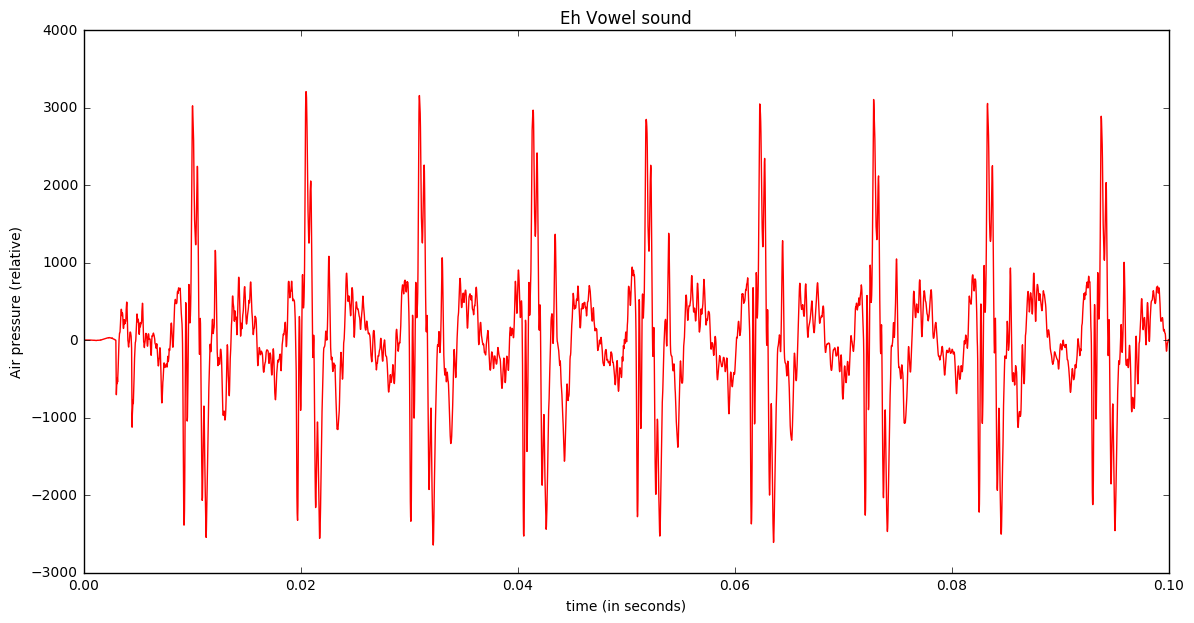

In [6]:
# Plot sound pressure level versus time

setup_graph(title='Eh Vowel sound', x_label='time (in seconds)', y_label='Air pressure (relative)', fig_size=(14,7))

plt.plot(time_array_eh, input_signal_eh,color='r')
plt.show()


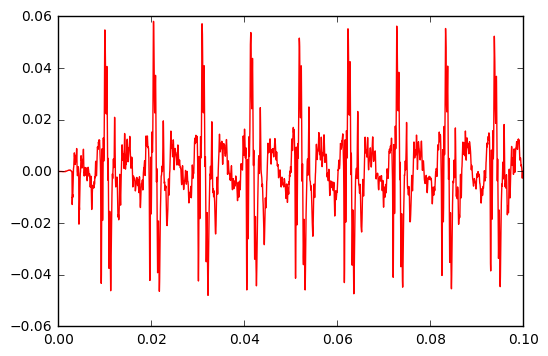

In [7]:
# linalg.norm functions don't seem to work with big arrays of integers so convert to floats

f_input_signal_eh = np.asfarray(input_signal_eh)

norm_f_input_signal_eh = f_input_signal_eh/np.linalg.norm(f_input_signal_eh)

plt.plot(time_array_eh, norm_f_input_signal_eh,color='r')
plt.show()

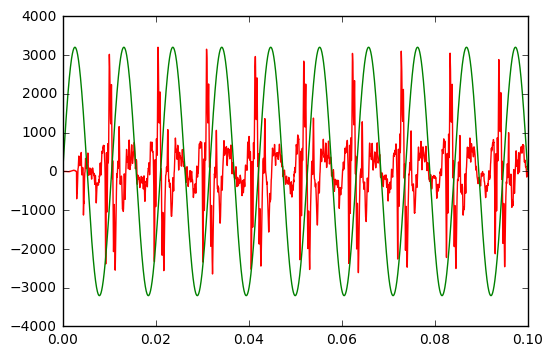

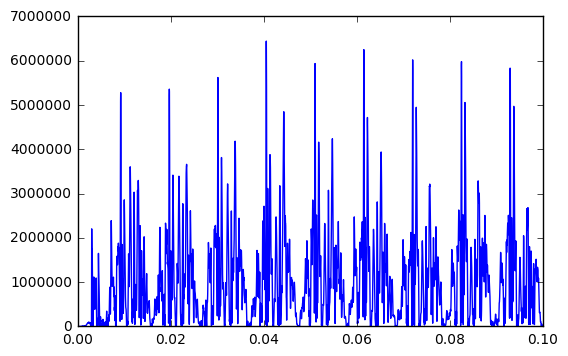

In [8]:
##Absolute Value of pointwise product of sine function signal with similar frequency and diff phase.
x_cycles = 9.5 # number of cycles in the 0.1 s period

x_ang_freq = (x_cycles * 2 * np.pi) / 0.1 # convert to angular frequency

x_sin_signal = np.sin(x_ang_freq * (time_array_eh)) # Make a sine wave

x_sin_signal = x_sin_signal * np.amax(f_input_signal_eh) # Scale it to match the actual signal

plt.plot(time_array_eh, f_input_signal_eh,color='r')
plt.plot(time_array_eh, x_sin_signal,color='g')
plt.show()

signal_product_freq_similar = x_sin_signal * f_input_signal_eh # Pointwise product of the two signals

plt.plot(time_array_eh, np.sqrt(signal_product_freq_similar**2),color='b')
plt.show()

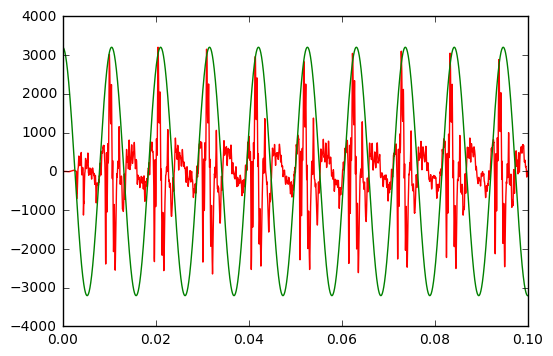

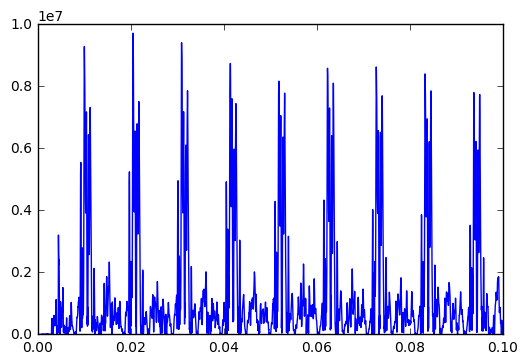

In [9]:
#Absolute Value of pointwise product of cosine function signal with similar frequency and diff phase.
x_cocycles = 9.5 # number of cycles in the 0.1 s period

x_ang_cofreq = (x_cocycles * 2 * np.pi) / 0.1 # convert to angular frequency

x_cos_signal = np.cos(x_ang_cofreq * (time_array_eh)) # Make a cosine wave

x_cos_signal = x_cos_signal * np.amax(f_input_signal_eh) # Scale it to match the actual signal

plt.plot(time_array_eh, f_input_signal_eh,color='r')
plt.plot(time_array_eh, x_cos_signal,color='g')
plt.show()

signal_product_cofreq_similar = x_cos_signal * f_input_signal_eh # Pointwise product of the two signals

plt.plot(time_array_eh, np.sqrt(signal_product_cofreq_similar**2),color='b')
plt.show()
         



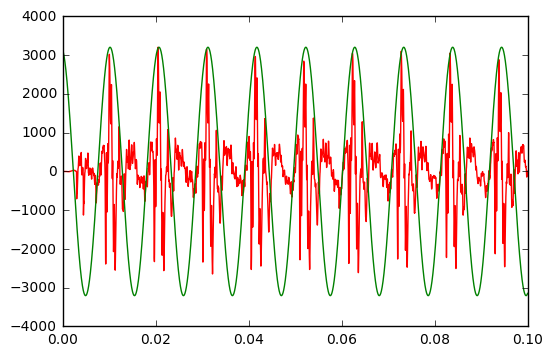

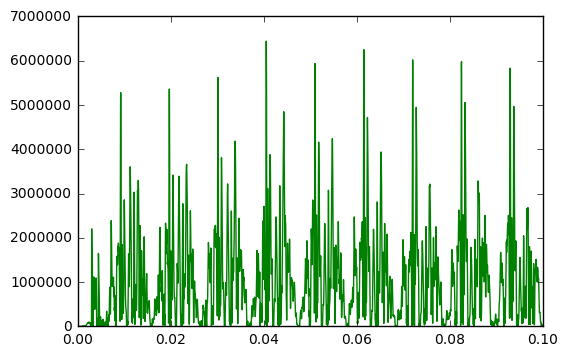

In [10]:
#Function of sine wave where both frequency and phase are in match
X_cycles = 9.5 # number of cycles in the 0.1 s period
X_phase = (1.25 * 2 * np.pi) / 0.1 # phase shift 


X_ang_freq = (X_cycles * 2 * np.pi) / 0.1 # convert to angular frequency

X_sin_signal = np.sin(X_ang_freq * (time_array_eh + X_phase)) # Make a sine wave

X_sin_signal = X_sin_signal * np.amax(f_input_signal_eh) # Scale it to match the actual signal

plt.plot(time_array_eh, f_input_signal_eh,color='r')
plt.plot(time_array_eh, X_sin_signal,color='g')
plt.show()

signal_product_freq_phase_similar = x_sin_signal * f_input_signal_eh # Pointwise product of the two signals


plt.plot(time_array_eh, np.sqrt(signal_product_freq_phase_similar**2),color='g')
plt.show()

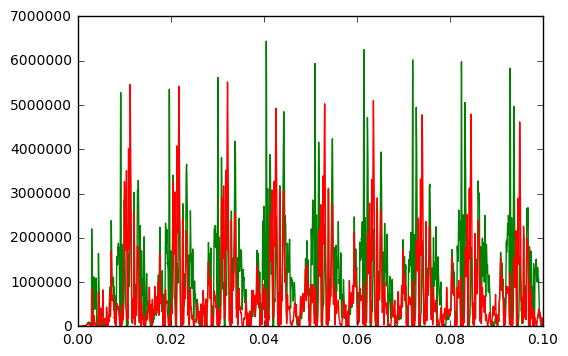

In [13]:
#Plot of the two above plots and sine function with frequency and phase same
plt.plot(time_array_eh, np.sqrt(signal_product_freq_phase_similar**2),color='g')
#plt.plot(time_array_eh, np.sqrt(signal_product_different**2),color='c')
#plt.plot(time_array_eh, np.sqrt(np.sum(signal_product_freq_similar**2))/2,color='g')
#[x + y for x, y in zip(abs_sin, abs_cos)]
sum_cos_sin = np.add(signal_product_freq_similar, signal_product_cofreq_similar)/2
line2d = plt.plot(time_array_eh,np.sqrt(sum_cos_sin**2), color='r')

plt.show()

